# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [156]:
%matplotlib inline
# import numpy and pandas

import numpy as no
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [157]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [158]:
# Your code here:

fifa.Value.value_counts()

€1.1M      431
€375K      372
€425K      354
€325K      351
€450K      343
          ... 
€36M         1
€43M         1
€46M         1
€59M         1
€110.5M      1
Name: Value, Length: 217, dtype: int64

In [159]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [160]:
# Your code here:
fifa.Value[0].replace('€', '').replace('M', '')

'110.5'

In [161]:
fifa.Value.value_counts()

€1.1M      431
€375K      372
€425K      354
€325K      351
€450K      343
          ... 
€36M         1
€43M         1
€46M         1
€59M         1
€110.5M      1
Name: Value, Length: 217, dtype: int64

In [ ]:
#df.Marca = df.Marca.str.replace(r'\s+\d', '', regex = True).str.strip(' ')

In [164]:
fifa['ValueNumeric'] = fifa.Value.str.replace('€', '').str.replace('M', '').str.lower()#.str.replace('K', '')

In [166]:
fifa.ValueNumeric

0        110.5
1           77
2        118.5
3           72
4          102
         ...  
18202      60k
18203      60k
18204      60k
18205      60k
18206      60k
Name: ValueNumeric, Length: 18207, dtype: object

In [167]:
def cambiar_k(letra):
    
    if 'k' in letra:
        letra = letra.replace('k','')
        letra = float(letra)/1000
        return letra
    else:
        letra = float(letra)
        return letra

In [168]:
fifa.ValueNumeric = fifa.ValueNumeric.apply(cambiar_k)

In [169]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

In [170]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

#PROGRAMA EJEMPLO 

a = '60K'

if 'K' in a:
    a = a.replace('K','')
    a = float(a)/100
else :
    a = float(a)
    
a

print(type(a))

PROGRAMAS EJEMPLO

def cambiar_Activity(Activity): 
    if Activity == 'surfing':
        return Activity
    if Activity == 'swimming':
        return Activity
    if Activity == 'fishing':
        return Activity

    return 'otras actividades'

shark_2['Activity'] = shark_2.Activity.apply(cambiar_Activity)

In [171]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5


In [172]:
fifa.ValueNumeric = pd.to_numeric(fifa.ValueNumeric)

In [173]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [174]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway


In [175]:
modelo_simple = ols('ValueNumeric ~ Position', data = fifa).fit()

In [176]:
sm.stats.anova_lm(modelo_simple)

,df,sum_sq,mean_sq,F,PR(>F)
Position,26.0,16496.092002,634.465077,20.784194,5.517758e-96
Residual,18120.0,553137.022264,30.526326,NaN,NaN


In [177]:
fifa.columns = fifa.columns.str.replace(' ', '_')

In [178]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak_Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [179]:
modelo_simple_2 = ols('ValueNumeric ~ Preferred_Foot', data = fifa).fit()

In [180]:
sm.stats.anova_lm(modelo_simple_2)

,df,sum_sq,mean_sq,F,PR(>F)
Preferred_Foot,1.0,160.997350,160.997350,5.132594,0.023492
Residual,18157.0,569542.215531,31.367639,NaN,NaN


In [181]:
modelo_simple_3 = ols('ValueNumeric ~ Position + Preferred_Foot', data = fifa).fit()
sm.stats.anova_lm(modelo_simple_3)

,df,sum_sq,mean_sq,F,PR(>F)
Position,26.0,16496.092002,634.465077,20.791849,5.031960e-96
Preferred_Foot,1.0,234.162243,234.162243,7.673655,5.608990e-03
Residual,18119.0,552902.860021,30.515087,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

PODEMOS DEDUCIR QUE NO SON IGUALES LAS MEDIAS DE POSICION CON RESPECTO AL VALOR DE 
JUGARO Y DE IGUAL FORMA LA PREFERRED FOOT CON EL VALOR, POR LO QUE SON DISNTINTAS


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [182]:
# Your code here:
modelo_simple_4 = ols('ValueNumeric ~ Nationality', data = fifa).fit()
sm.stats.anova_lm(modelo_simple_4)


,df,sum_sq,mean_sq,F,PR(>F)
Nationality,163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [183]:
# Your code here:
fifa.isnull().sum()


Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot     48
Position           60
Weak_Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [184]:
fifa.shape

(18207, 21)

In [185]:
fifa.dropna(inplace = True)

In [186]:
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [188]:
# Your code here:

fifa.head(100)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,J. Boateng,29,Germany,85,85,FC Bayern München,€30M,Right,RCB,4.0,...,72.0,69.0,91.0,58.0,81.0,81.0,47.0,75.0,46.0,30.0
96,A. Vidal,31,Chile,85,85,FC Barcelona,€26M,Right,CAM,4.0,...,55.0,83.0,79.0,85.0,93.0,84.0,80.0,80.0,81.0,26.0
97,I. Perišić,29,Croatia,85,85,Inter,€37.5M,Right,LM,5.0,...,88.0,89.0,78.0,79.0,65.0,69.0,85.0,79.0,76.0,37.5
98,E. Džeko,32,Bosnia Herzegovina,85,85,Roma,€30.5M,Right,ST,5.0,...,66.0,76.0,80.0,79.0,51.0,50.0,89.0,74.0,67.0,30.5


In [189]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(fifa.Stamina, fifa.SprintSpeed)
slope, intercept, r_value, p_value, std_err

(0.571607343479714,
 28.591661643355124,
 0.6194215111682525,
 0.0,
 0.005412439562273541)

This means that our regression equation is:

SpintSpeed = 28.591661 + 0.571607 * Stamina

La r cuadrada es 0,1766, que es relativamente pequeña. Esto significa que nuestro modelo solo captura el 17% de la variación en los datos.

El valor p es muy pequeño, esto significa que la pendiente es significativamente diferente de cero.

In [190]:
import statsmodels.api as sm

En el siguiente ejemplo, crearemos un modelo lineal que predice MPG 
utilizando la aceleración en el conjunto de datos de auto-mpg. 

import statsmodels.api as sm

X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

Here, we are not limited to only one predictor variable. Let's try this regression with more than one predictor.

X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']]) # adding a constant
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

In [191]:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']]) # adding a constant
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          8.04e-193
Time:                        13:23:56   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

In [ ]:
ValueNumeric = -3.0700 + 0.0604 * Stamina + 0.0263*SprintSpeed

In [196]:
fifa[fifa.ValueNumeric == 0.375]

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
2312,A. Boruc,38,Poland,74,74,Bournemouth,€375K,Right,GK,3.0,...,39.0,31.0,69.0,15.0,38.0,25.0,17.0,40.0,21.0,0.375
5856,Alex Geijo,36,Spain,69,69,Venezia FC,€375K,Right,ST,3.0,...,65.0,62.0,89.0,59.0,63.0,28.0,70.0,55.0,74.0,0.375
5950,C. Luna,36,Argentina,69,69,Club Atlético Tigre,€375K,Right,ST,3.0,...,48.0,29.0,77.0,65.0,80.0,45.0,62.0,41.0,79.0,0.375
6191,D. Álvarez,36,Colombia,69,69,Patriotas Boyacá FC,€375K,Right,ST,3.0,...,61.0,30.0,77.0,64.0,65.0,38.0,72.0,65.0,70.0,0.375
6200,K. Miller,38,Scotland,69,69,Dundee FC,€375K,Right,ST,4.0,...,65.0,82.0,69.0,70.0,72.0,44.0,68.0,65.0,62.0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,D. Esmel,20,Ivory Coast,60,72,1. FC Kaiserslautern,€375K,Right,LW,3.0,...,80.0,65.0,58.0,42.0,58.0,25.0,55.0,47.0,46.0,0.375
15233,V. Arboleda,21,Colombia,60,72,Portland Timbers,€375K,Right,RW,3.0,...,72.0,49.0,38.0,55.0,49.0,20.0,58.0,52.0,57.0,0.375
15249,L. Cruz,21,Mexico,60,72,Tigres U.A.N.L.,€375K,Left,ST,3.0,...,70.0,44.0,60.0,58.0,28.0,27.0,58.0,51.0,56.0,0.375
15270,B. Njie,20,Norway,60,72,Odds BK,€375K,Right,RW,3.0,...,86.0,61.0,42.0,47.0,38.0,18.0,58.0,46.0,51.0,0.375


In [199]:
-3.0700 + (0.0604 * 70) + (0.0263*44)

2.3152

In [155]:
fifa.ValueNumeric.value_counts()

1.100      431
0.375      366
0.425      349
0.325      344
0.450      340
          ... 
54.000       1
62.000       1
38.500       1
81.000       1
110.500      1
Name: ValueNumeric, Length: 217, dtype: int64

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:



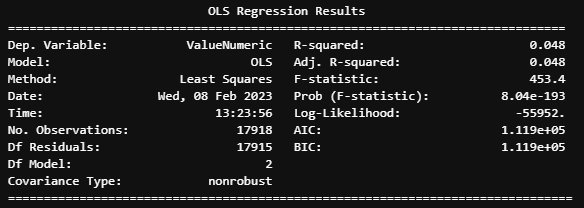

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [200]:

fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak_Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [202]:
# Your code here:
X_2 = sm.add_constant(fifa.Potential) # adding a constant
Y = fifa.ValueNumeric

model_2 = sm.OLS(Y, X_2).fit()
predictions_2 = model_2.predict(X_2) 

print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:39:39   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

In [ ]:
ValueNumeric = -35.4390 + 0.5312 * Potential

In [207]:
fifa[fifa.ValueNumeric == 1.1].Potential.mean()

73.31786542923435

In [209]:
fifa[(fifa.ValueNumeric == 1.1) & (fifa.Potential == 73) ]

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak_Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
2918,Benjamin Meseira,34,Brazil,73,73,Chapecoense,€1.1M,Right,RB,3.0,...,81.0,85.0,71.0,44.0,67.0,70.0,53.0,51.0,51.0,1.1
3104,Oswaldito Cuba,34,Brazil,73,73,Chapecoense,€1.1M,Left,LB,3.0,...,92.0,78.0,44.0,70.0,60.0,67.0,67.0,66.0,59.0,1.1
3122,Mauro Cildinho,34,Brazil,73,73,Sport Club do Recife,€1.1M,Right,RB,3.0,...,69.0,78.0,46.0,41.0,58.0,77.0,49.0,60.0,50.0,1.1
5699,F. Hartherz,25,Germany,69,73,DSC Arminia Bielefeld,€1.1M,Left,LB,3.0,...,85.0,92.0,82.0,58.0,73.0,59.0,49.0,52.0,44.0,1.1
5715,Alberto,25,Spain,69,73,CD Tenerife,€1.1M,Right,LCB,2.0,...,63.0,83.0,84.0,65.0,77.0,68.0,50.0,62.0,47.0,1.1
5772,J. Pelupessy,25,Netherlands,69,73,Sheffield Wednesday,€1.1M,Right,RDM,3.0,...,67.0,82.0,73.0,46.0,80.0,71.0,54.0,62.0,50.0,1.1
5802,P. Ziereis,25,Germany,69,73,FC St. Pauli,€1.1M,Right,RCB,3.0,...,77.0,56.0,73.0,19.0,69.0,67.0,25.0,46.0,33.0,1.1
5871,J. Moya,25,Colombia,69,73,Independiente Santa Fe,€1.1M,Right,CB,3.0,...,51.0,65.0,74.0,33.0,57.0,72.0,22.0,30.0,36.0,1.1
5987,G. Valsvik,25,Norway,69,73,Eintracht Braunschweig,€1.1M,Left,LCB,2.0,...,54.0,72.0,91.0,59.0,74.0,69.0,44.0,43.0,33.0,1.1
6104,Ilori,25,Portugal,69,73,Reading,€1.1M,Right,RCB,3.0,...,73.0,64.0,74.0,34.0,58.0,73.0,32.0,43.0,41.0,1.1


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

En esto, podemos verificar el valor p (enumerado como Prob F-statistic) en el resumen para determinar si se debe rechazar o aceptar la hipótesis nula. Aquí el valor p es la probabilidad de que la hipótesis nula para el modelo completo sea verdadera (es decir, que todos los coeficientes de regresión sean cero). Dado que el valor p es aproximadamente cero, rechazamos la hipótesis nula. En otras palabras, existe evidencia que sugiere que existe una relación lineal entre el precio y el conjunto de variables predictoras.


https://medium.com/analytics-vidhya/f-statistic-understanding-model-significance-using-python-c1371980b796

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

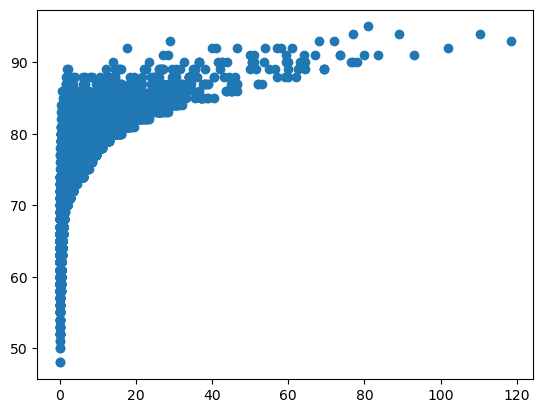

In [210]:
# Your code here:
import matplotlib.pyplot as plt


plt.scatter(fifa.ValueNumeric, fifa.Potential)
plt.show()


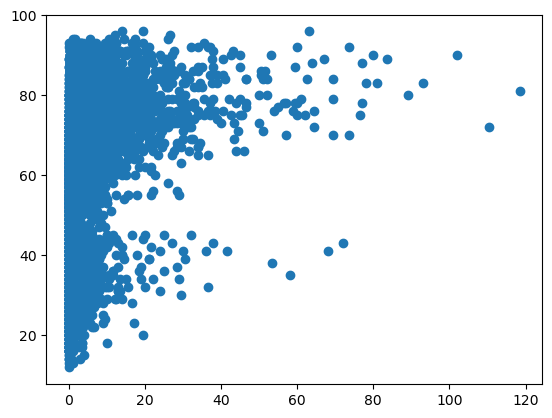

In [211]:
import matplotlib.pyplot as plt


plt.scatter(fifa.ValueNumeric, fifa.Stamina)
plt.show()


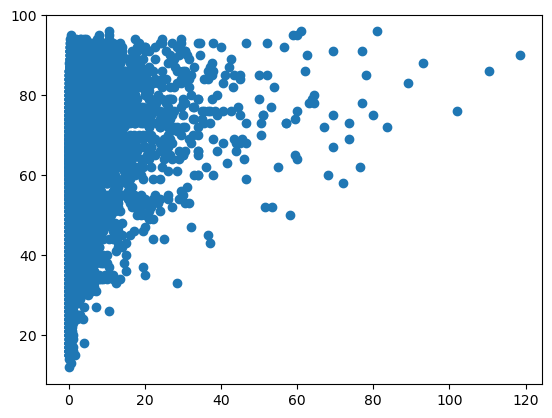

In [212]:
import matplotlib.pyplot as plt


plt.scatter(fifa.ValueNumeric, fifa.SprintSpeed)
plt.show()


SEGUNDA TABLA VALUENUMERIC = POTENTIAL

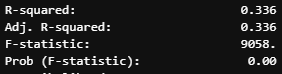


primera tabla  VALUENUMERIC = STAMINE + SPRING

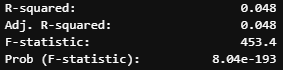
